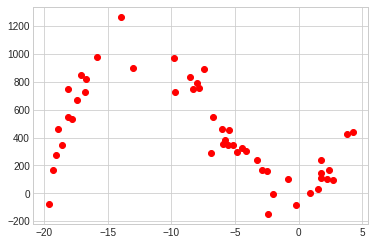

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from sklearn.model_selection import train_test_split

#I generate a random set of X values and plug them into a given equation, which is the goal equation
#noise is added to generate the dataset so it is not exactly the equation
noise_scale = 100
#dataset size
number_of_samples = 50
#random generation of x
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
#use x to generate y
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

#plot the raw data
plt.plot(x,y,'ro')

MSE:  335180.31715069164
Coefficients: [ 0.99818866 20.26840489 10.00950571  1.26997138]
Estimated Polynomial:         3         2
0.9982 x + 20.27 x + 10.01 x + 1.27


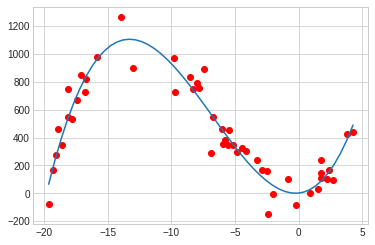

In [ ]:
from sklearn.metrics import mean_squared_error
#plot the raw data
plt.plot(x,y,'ro')
#normalizing the data
x = np.squeeze(x)
y = np.squeeze(y)
#performing polyfit to find the coefficients of the polynomial to fit the data
coefs = np.polyfit(x,y,3)
#using np.poly1d to create the polynomial 
ffit = np.poly1d(coefs)
new_x = np.linspace(np.min(x), np.max(x))
#generating the new y values in order to plot the data
new_y = ffit(new_x)
#plot the polynomial
plt.plot(new_x, new_y)

print("MSE: ", mean_squared_error(y, new_y))
print("Coefficients:" , coefs)
print("Estimated Polynomial:", ffit)

In [ ]:
#initialize population
import random
best=-100000
populations =([[random.randint(0,25) for x in range(4)] for i in range(4)])
parents=[]
new_populations = []
#generates a 2d array to be used as the population and made of "genes" and "chromosomes"
print(populations)

[[17, 7, 19, 24], [18, 19, 17, 19], [8, 15, 4, 21], [22, 14, 21, 21]]


In [ ]:
#y = 5 * x + 20 * x**2 + 1 * x**3
def fitness_score() :
    global populations,best
    fit_value = []
    fit_score=[]
    for i in range(len(populations)) :
      coefs = []
      for j in range(len(populations[i])):
        #generate the coefficients array
        coefs.append(populations[i][j]) 
      #generate the polynomial
      ffit = np.poly1d(coefs)
     # print(ffit)
      new_y = ffit(x)
      fit_value.append(mean_squared_error(y, new_y))
    #print(fit_value)
    #sort by MSE values
    fit_value, populations = zip(*sorted(zip(fit_value, populations) , reverse = False))
    #print(fit_value)
    #print(populations)
    best= fit_value[0]
    
fitness_score()

In [ ]:
def selectparent():
    global parents
    #global populations , parents
    #select the best two parents
    parents=populations[0:2]
    parents = list(parents)
    #print(type(parents))
    #print(parents)
selectparent()

In [ ]:
def crossover() :
    global parents
    #defines the crossover rate: when to perform crossover
    if(np.random.uniform(0.0, 1.0) <= 0.4):
      cross_point = random.randint(0,3) 
      #single point crossover array manipulation
      parents.append((parents[0][0:cross_point +1] + parents[1][cross_point+1:4]))
      parents.append((parents[1][0:cross_point +1] + parents[0][cross_point+1:4]))
    
    #print(parents)
    

crossover()

In [ ]:
def mutation() :
    global populations, parents
    #mutation rate
    if(np.random.uniform(0.0, 1.0) <= 0.2):
      #randomly pics a trait to mutate and by what to mutate it by
        if len(parents) == 2:
          x=random.randint(0,1)
        else:
          x=random.randint(0,3)
        y = random.randint(0,3)
        val = random.choice([-1,1])
        parents[x][y] = parents[x][y] + val
    populations = parents
    #print(populations)
mutation()

best score :
11114.122940957308
sequence........
[1, 20, 6, 10]
   3      2
1 x + 20 x + 6 x + 10


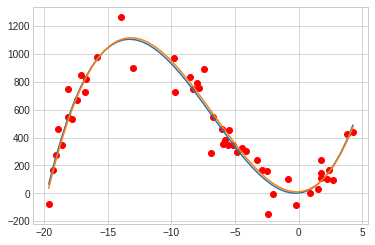

In [ ]:
for i in range(95) :
    fitness_score()
    selectparent() 
    crossover()
    mutation()
print("best score :")
print(best)
print("sequence........")
print(populations[0])

fig, (ax1) = plt.subplots(1)
plt.plot(x,y,'ro')
plt.plot(new_x, new_y)
ffit = np.poly1d(populations[0])
new_y_GA = ffit(new_x)
plt.plot(new_x, new_y_GA)
print(ffit)